In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve

from lib.utils import get_train_split_data, load_all_resale_data, get_cleaned_normalized_data, get_feature_optimised_data
from lib.eval import get_regression_metrics

# Set plot style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

In [3]:
# Load and prepare data
X, y = load_all_resale_data()
X, y = get_cleaned_normalized_data(X, y)
X_opt, Y_opt = get_feature_optimised_data(X, y)
X_train, X_test, y_train, y_test = get_train_split_data(X, y, 0.2)
X_opt_train, X_opt_test, y_opt_train, y_opt_test = get_train_split_data(X_opt, Y_opt, 0.2)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv...
Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv...
Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv...
Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv...
Loading data from /Users/amonsisowath/VSC/Uni/Sing2425/CS3244/Assignment1/scripts/lib/../data/Resale flat prices based on registration date from Jan-2017 onwards.csv...
Combined dataset shape: (948962, 11)
Features shape: (948962, 10)
Target shape: (948962,)
Selected features: month, town, flat_type, block, street_name, storey

In [4]:
# Function to plot learning curves
def plot_learning_curve(estimator, X, y, title, ylim=None, cv=5,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score (R²)")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=train_sizes, scoring='r2')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

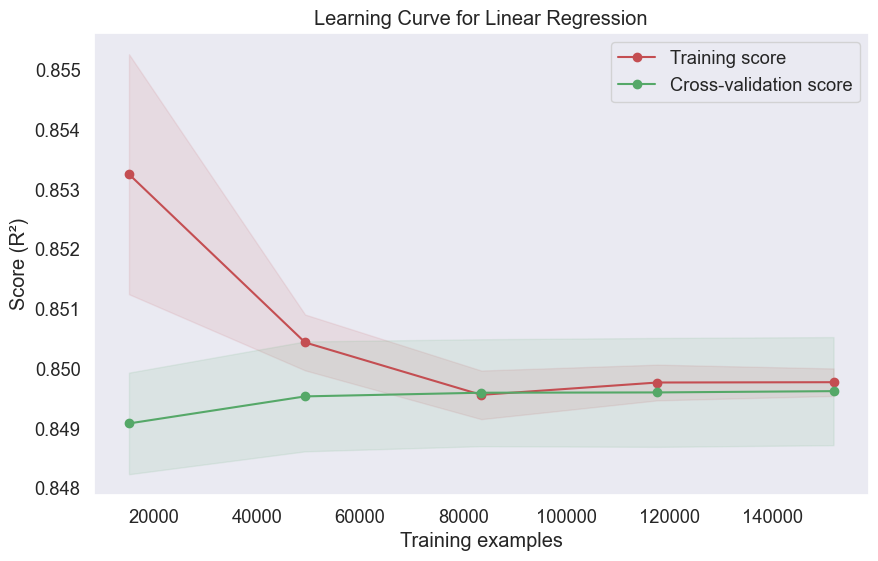

KeyboardInterrupt: 

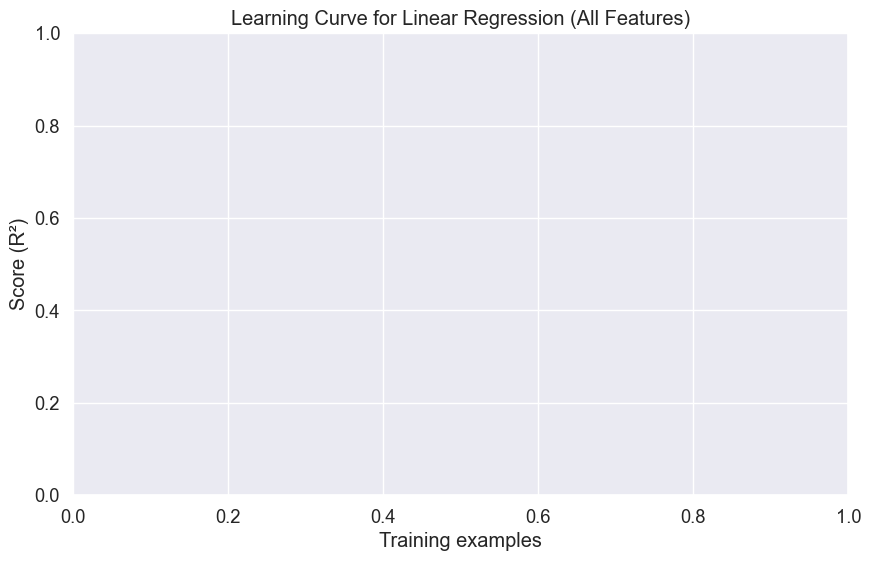

In [5]:
# 1. Linear model (baseline)
linear_model = LinearRegression()
linear_model_all = LinearRegression()

# Plot learning curve
plot_learning_curve(linear_model, X_opt_train, y_opt_train, 
                   "Learning Curve for Linear Regression")
plt.show()

plot_learning_curve(linear_model, X_train, y_train, 
                   "Learning Curve for Linear Regression (All Features)")
plt.show()

# Train and evaluate
linear_model.fit(X_opt_train, y_opt_train)
y_pred_train = linear_model.predict(X_opt_train)
y_pred_test = linear_model.predict(X_opt_test)

linear_model_all.fit(X_train, y_train)
y_pred_train_all = linear_model.predict(X_train)
y_pred_test_all = linear_model.predict(X_test)

# Calculate errors
train_metrics = get_regression_metrics(y_opt_train, y_pred_train)
test_metrics = get_regression_metrics(y_opt_test, y_pred_test)
train_rmse = train_metrics['rmse']
train_r2 = train_metrics['r2']
test_rmse = test_metrics['rmse']
test_r2 = test_metrics['r2']



print(f"Linear Model - Training RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
print(f"Linear Model - Training R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
print(f"Linear Model (All Features) - Training RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
print(f"Linear Model (All Features) - Training R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

Degree 1 model seems to be finished at 80000 training samples (for both the full_model containg around 3k features and the feature optimised model with 50 features. )